# Analysis notebook: `SU2020e_CRY_onspill-LH_aw`  

## Define analysis name

In [1]:
ana_label = "SU2020e_CRY_onspill-LH_aw"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020e_CRY_onspill-LH_aw

analysis.csv  events.parquet  info.txt	   SU2020e_CRY_onspill-LH_aw.log
cut_flow.csv  hists.h5	      results.pkl  SU2020e_CRY_onspill-LH_aw.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020e_CRY_onspill-LH_aw


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020e_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020e_CRY_onspill-LH_aw/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020e_CRY_onspill-LH_aw/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020e_CRY_onspill-LH_aw/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/SU2020e_CRY_onspill-LH_aw/events.parquet
[Load] ✅ Loaded info from ../../../output/results/SU2020e_CRY_onspill-LH_aw/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2610933,100.000,100.000,No selection applied
1,has_trk_front,Preselect,2558235,97.982,97.982,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2478213,94.917,96.872,Electron track fits
3,is_downstream,Preselect,1511971,57.909,61.011,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,1127303,43.176,74.559,One reco electron / event
5,is_truth_electron,Preselect,320797,12.287,28.457,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,253945,9.726,79.161,Track fit quality > 0.2
7,within_t0,Tracker,203340,7.788,80.072,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,has_hits,Tracker,200387,7.675,98.548,>20 active tracker hits
9,within_d0,Tracker,60522,2.318,30.203,Distance of closest approach (d_0 < 100 mm)


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,21146,3435,431,8,3,1
1,N,41100000000,41100000000,41100000000,21146,3435,431
2,Eff [%],0.000051,0.000008,0.000001,99.962168,99.912664,99.767981
3,Eff Err$-$ [%],-0.0,-0.0,-0.0,-0.015943,-0.066973,-0.373768
4,Eff Err$+$ [%],0.0,0.0,0.0,0.011217,0.03792,0.14336
5,Rate 1B [$\text{day}^{-1}$],55.084142,8.947982,1.122731,0.02084,0.007815,0.002605
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-0.376709,-0.151829,-0.053769,-0.007181,-0.004238,-0.002151
7,Rate 1B Err$+$ [$\text{day}^{-1}$],0.379304,0.154437,0.056417,0.010225,0.007564,0.005961
8,Rate 2B [$\text{day}^{-1}$],42.082916,6.836036,0.857738,0.015921,0.00597,0.00199
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-0.287797,-0.115994,-0.041078,-0.005486,-0.003238,-0.001643


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020e_CRY_onspill-LH_aw/h1o_1x3_mom_windows.png


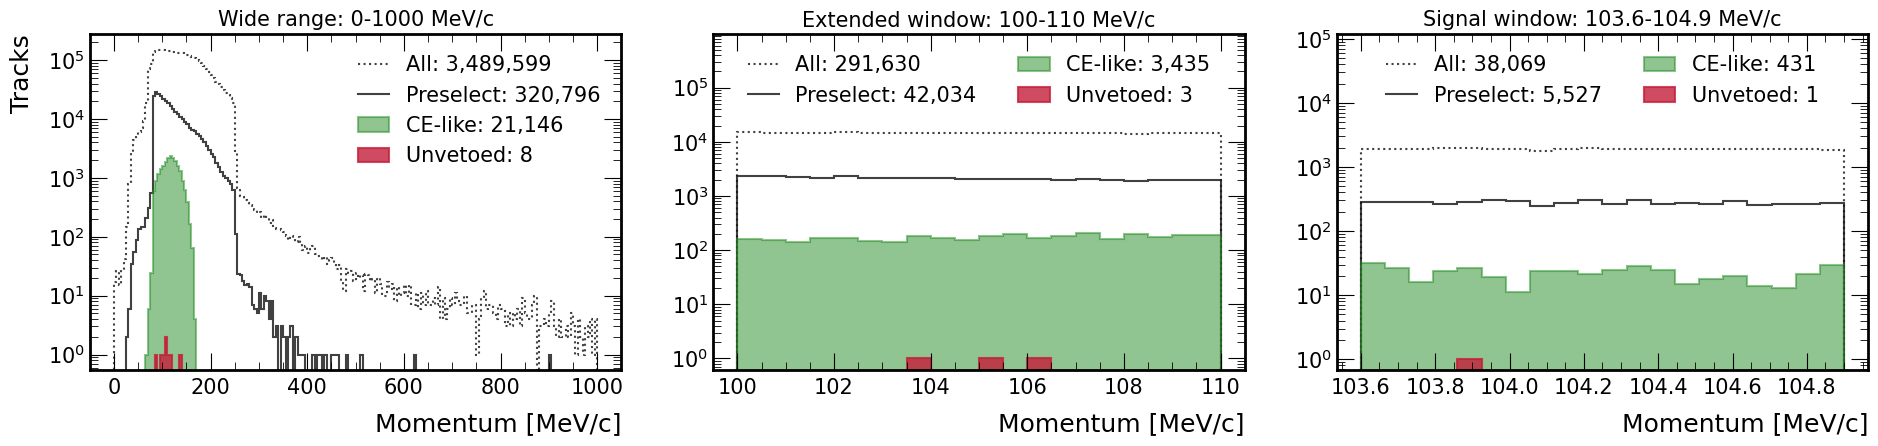

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020e_CRY_onspill-LH_aw/h1o_3x3_summary.png


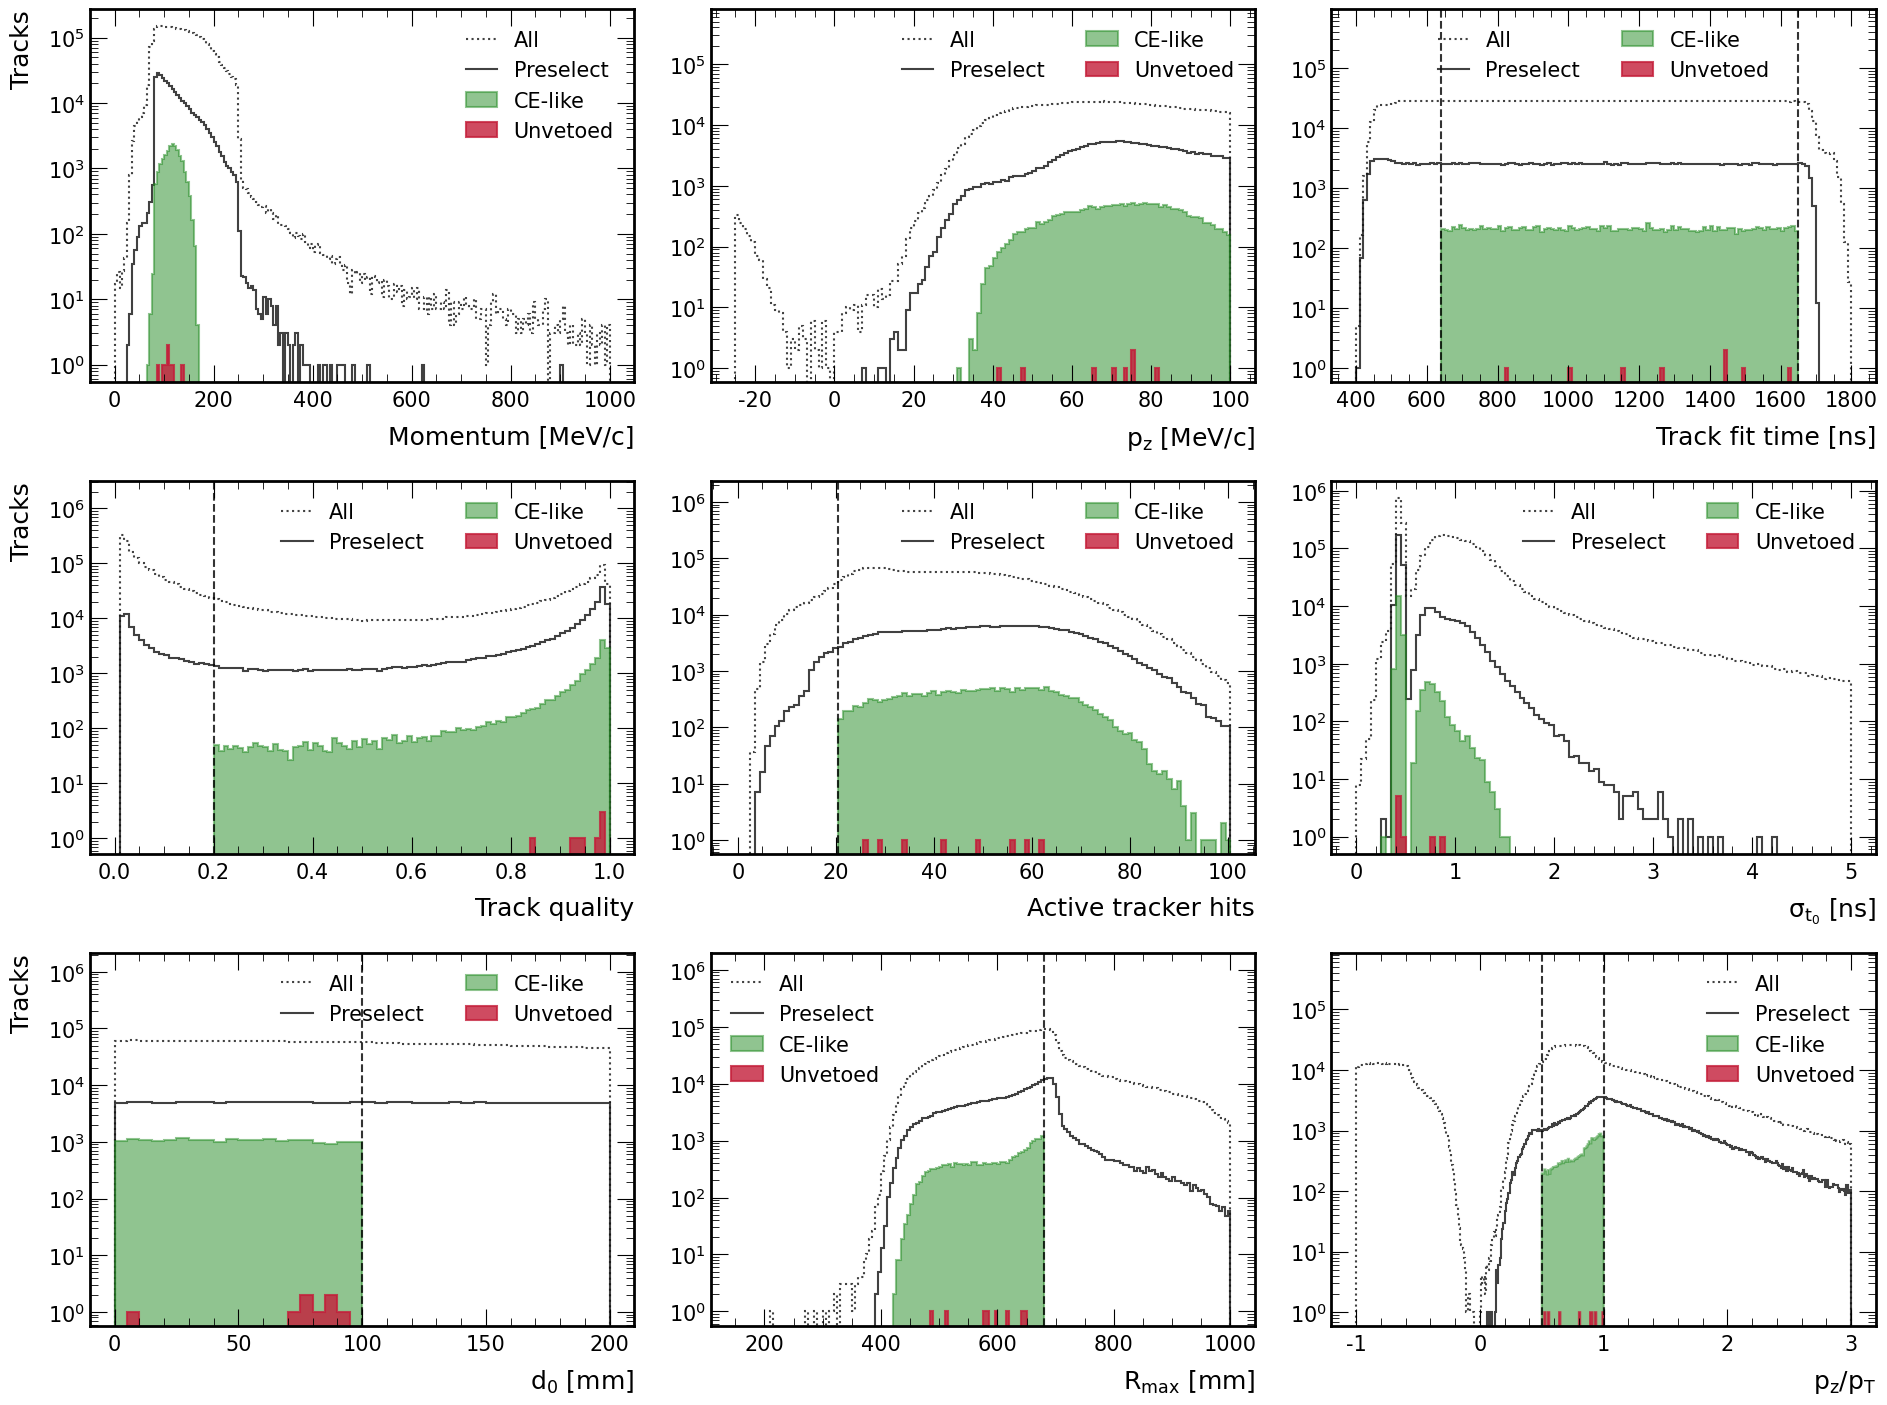

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020e_CRY_onspill-LH_aw/h1o_2x2_mom_summary.png


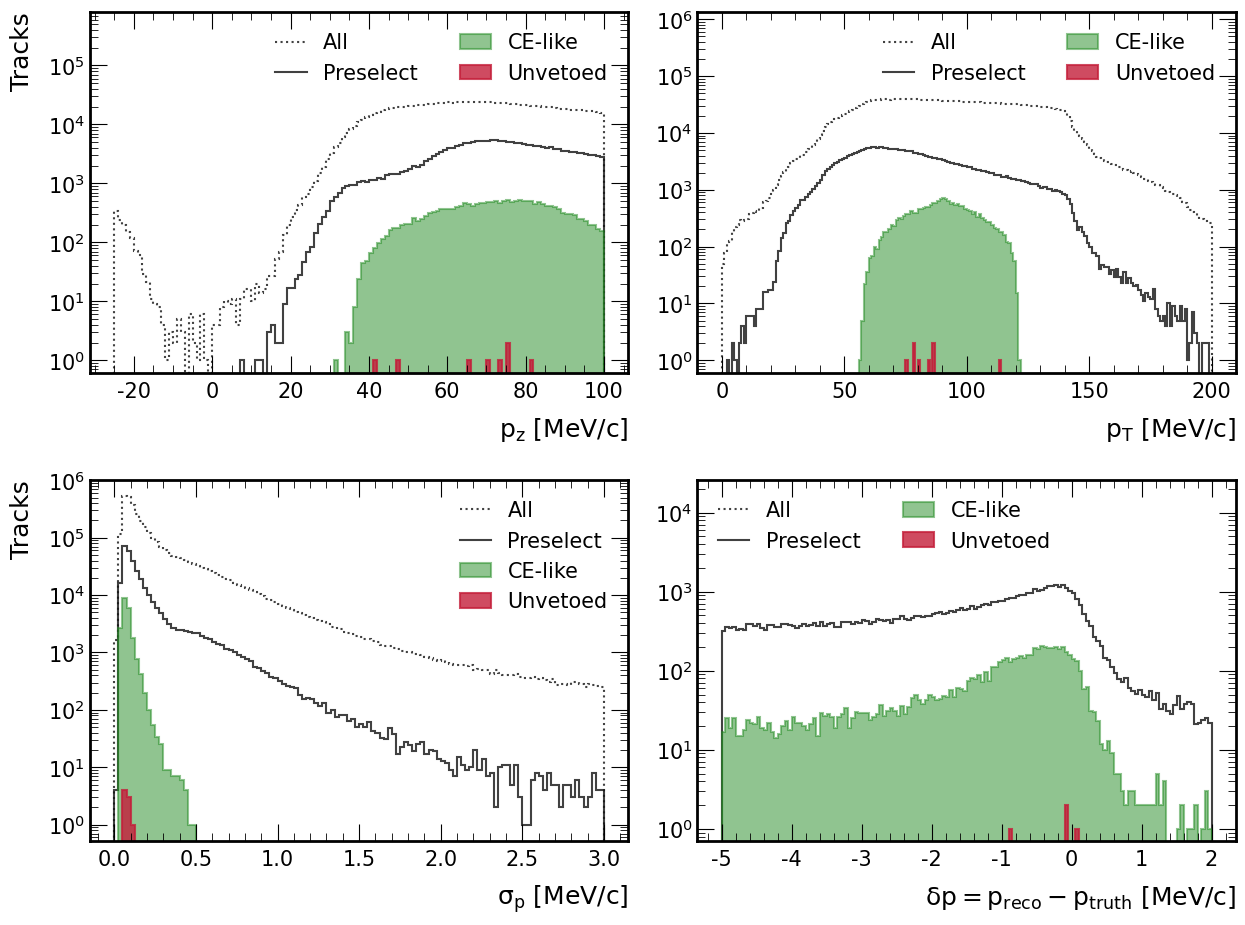

In [11]:
draw.plot_mom_summary(results["hists"], out_path=f"{img_dir}/h1o_2x2_mom_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020e_CRY_onspill-LH_aw/h1o_crv_z.png


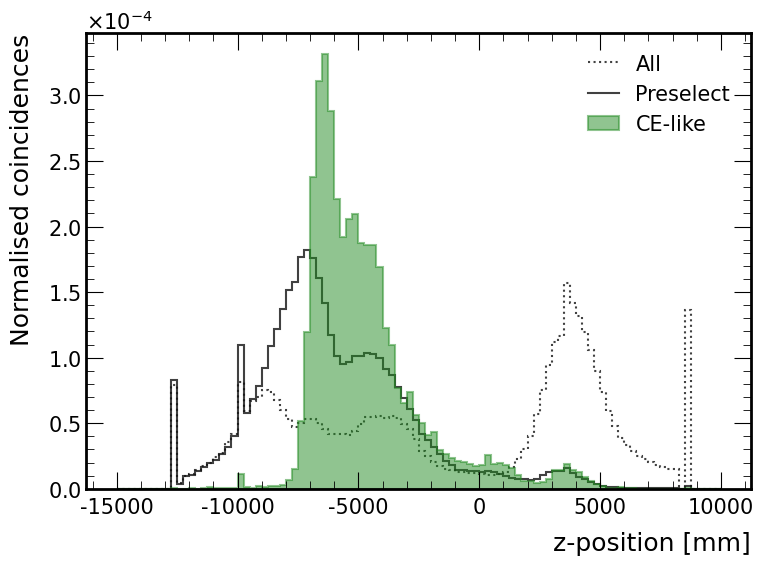

In [12]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [13]:
print(results["event_info"])

  Index:            41
  Subrun:           [3113]
  Event:            [86303]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aw_perfect_v1_3_v06_06_00.001202_00000034.root
  Track time [ns]:  1004.446186
  Coinc time [ns]:  853.687317
  dt [ns]:          150.758869
----------------------------------------
  Index:            68
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aw_perfect_v1_3_v06_06_00.001202_00000075.root
  Track time [ns]:  1445.708854
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            213
  Subrun:           [19742]
  Event:            [359830]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aw_perfect_v1_3_v06_06_00.001202_00015581.root
  Track time [ns]:  822.944824
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            242
  Subr

In [14]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 8 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 3113
evt.event: 86303
crv.crvcoincs.time: [854]
crv.crvcoincs.nHits: [16]
crv.crvcoincs.pos.fCoordinates.fZ: [2.55e+03]
at_trk_front: [[False, False, False, False, True, False], [False, False, ..., False]]
has_trk_front: [True, True]
is_reco_electron: [True, False]
is_downstream: [True, True]
one_reco_electron: [True, True]
one_reco_electron_per_event: True
is_truth_electron: [True, True]
good_trkqual: [True, True]
within_t0: [True, True]
has_hits: [True, True]
within_t0err: [True, True]
within_d0: [True, True]
pitch_angle: [[0.487, 0.343, 0.346, 0.544, 0.527, 0.57], [0.482, 0.339, ..., 0.571]]
within_pitch_angle_lo: [True, True]
within_pitch_angle_hi: [True, True]
within_lhr_max_lo: [True, True]
within_lhr_max_hi: [True, True]
unvetoed: [True, False]
within_ext_win: [Fa